# Code for generating Figure 2

## "Memory performance can be quantified in terms of mutual information"

This Python notebook contains code for generating the second figure from the paper "Storing long-lived memories via molecular error correction: a minimal mathematical model of Crick's memory switch".

In [56]:
%load_ext autoreload
%autoreload 2

# imports
import numpy as np
import matplotlib.pyplot as plt

from functions.solutions import get_probs_noisefree_twostate, get_probs_twostate
from functions.MI import get_MI, get_t_life, get_capacity, get_performances

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
# aesthetics
lw = 4
c_red = (1,0,0)
c_green = np.array([57,181,74])/255
c_lightblue = np.array([187,214,255])/255

# ----------

# saving-related utility function
results_folder = 'results/fig2/'
format_list = ['.png', '.svg', '.pdf']

def save_file(name):
    for end in format_list:
        plt.savefig(results_folder+name+end, bbox_inches='tight', transparent=True)
    return

<center>
<img src="fig_images/fig2-MI.png" width="1000"/></center>

**Caption.** (a) Left: histogram visualization of two-state model probabilities given no stimulus ($u = 0$); note that the system is most likely to be in its unmarked state (red) as opposed to its marked state (green). Right: histograms of two-state model probabilities over time given a stimulus ($u = 1$). (b) Mutual information $I(t)$ vs time for the two-state model ($\gamma = 1, \epsilon = 0.1$). It is bounded between zero (no memory) and one (perfect memory, dashed gray line). We define capacity as $C := I(0)$, and lifetime as the time $t_*$ at which $I(t)$ equals half of its initial value. (c) Lifetime vs $1/\gamma$ for the two-state model ($\epsilon = 0.1$). (d) Capacity vs $1/\gamma$ for the two-state model ($\epsilon = 0.1$). (e) Performance ($J$) is defined as the discounted area under the mutual information curve (shaded yellow region). (f) Performance vs $1/\gamma$ for the two-state model ($\epsilon = 0.1, r = 1/100$). Note that it is maximized when $\gamma \approx 5.55$.

## a. Steady-state vs time-dependent distribution

Visualize the steady-state distribution of the two-state model over time using a two-bar histogram.

In [65]:
t_min, t_max, num_t = 0, 1., 5000
t = np.array([0, 0.5, 1]); num_t = len(t)

eps, gamma = 0.1, 1; params = {'eps':eps, 'gamma':gamma}
pi, p_t = get_probs_twostate(t, params)
p_0, p_1 = p_t.T

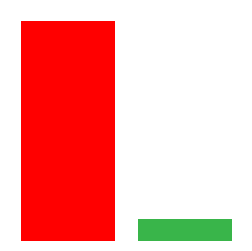

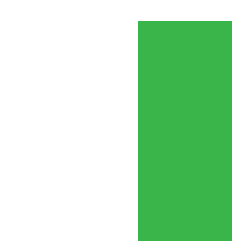

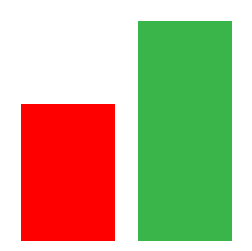

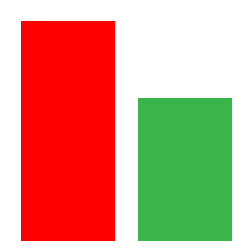

In [67]:
def save_prob_bar_plot(p_0, p_1, name):
    fig, ax = plt.subplots(figsize=(3,3))
    plt.bar([0, 1], [p_0, p_1], color=[c_red, c_green])
    ax.axis('off')
    save_file(name)
    plt.show()
    return


save_prob_bar_plot(pi[0], pi[1], 'bar_pss')

save_prob_bar_plot(p_0[0], p_1[0], 'bar_t0')
save_prob_bar_plot(p_0[1], p_1[1], 'bar_t1')
save_prob_bar_plot(p_0[2], p_1[2], 'bar_t2')

## b. Definition of memory lifetime and capacity

Mutual information vs time curve for the two-state model. Partly used to illustrate how memory lifetime and capacity are defined.

In [76]:
# Parameters
eps, gamma = 0.1, 1.; params = {'eps':eps, 'gamma':gamma}
t_min, t_max, num_t = 0, 1., 5000
t = np.linspace(t_min, t_max, num_t)


# Get two-state model probabilities
p_z_given_0, p_z_given_1 = get_probs_twostate(t, params)
p_0, p_1 = p_t.T


# Compute mutual information
MI = get_MI(p_z_given_0, p_z_given_1)


# Compute memory lifetime
t_life = t[np.argwhere(MI <= 0.5*MI[0])[0]][0]
t_arg = np.argwhere(MI <= 0.5*MI[0])[0][0] 

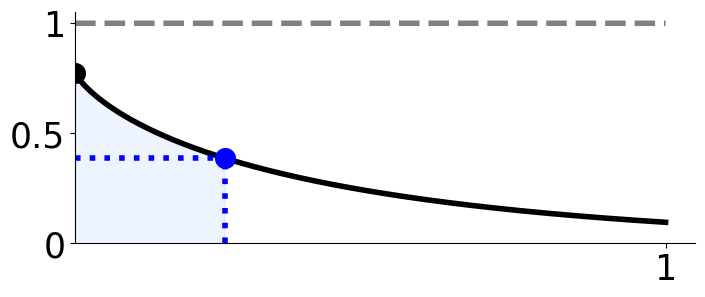

In [78]:
fig, ax = plt.subplots(figsize=(8,3))


plt.plot(t, MI, color='black', linewidth=lw)

plt.plot(t, np.ones_like(t), linestyle='--', color='gray', linewidth=lw) 

plt.scatter(0, MI[0], color='black', s=200,zorder=3)

plt.scatter(t_life, 0.5*MI[0], color='blue', s=200, zorder=3)
plt.plot( t_life*np.ones(10), np.linspace(0, 0.5*MI[0], 10), linestyle='dotted', color='blue', linewidth=4, alpha=1)
plt.plot( np.array([0, t_life]), 0.5*MI[0]*np.array([1,1]), linestyle='dotted', linewidth=lw, color='blue', alpha=1)

plt.fill_between(t[:t_arg], MI[:t_arg], alpha=0.25, color=c_lightblue) 



ax.spines[['right', 'top']].set_visible(False)
plt.xticks([1],fontsize=25); 
plt.yticks([0,0.5, 1], ['0','0.5', '1'], fontsize=25)
plt.xlim(0, None); plt.ylim(0, None)

save_file('MI_demo')
plt.show()

## c. Lifetime of two-state model vs turnover time scale

Plot lifetime of two-state model vs turnover time scale ($1/\gamma$).

In [87]:
t_min, t_max, num_t = 0, 5, 10000
t = np.linspace(t_min, t_max, num_t)

eps = 0.1
inv_gamma = np.linspace(0.01, 20, 1000)

params_list = []
for i in range(len(inv_gamma)): params_list.append( {'eps':eps, 'gamma':1/inv_gamma[i]}   )
t_life = get_t_life(t, params_list, get_probs_twostate, get_MI )

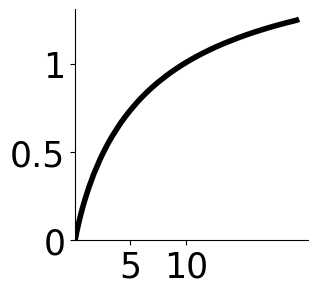

In [88]:
fig, ax = plt.subplots(figsize=(3,3))

plt.plot(inv_gamma, t_life, color='black', linewidth=lw)

plt.xlim(0,None); plt.ylim(0, None)
plt.xticks([5, 10],fontsize=25); 
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'],fontsize=25); 
ax.spines[['right', 'top']].set_visible(False)

save_file('lifetime_twostate')
plt.show()

## d. Capacity of two-state model vs turnover time scale

Plot capacity of two-state model vs turnover time scale ($1/\gamma$).

In [92]:
epsilon = 0.1
inv_gamma = np.linspace(0.01, 20, 1000)

p = epsilon/(1/inv_gamma + epsilon) + 1e-15    # small offset helps avoid issue with log 0
C = get_capacity(p)

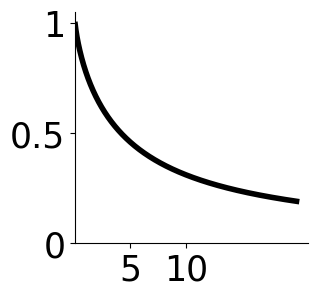

In [94]:
fig, ax = plt.subplots(figsize=(3,3))

plt.plot(inv_gamma, C, color='black',linewidth=lw)

plt.xlim(0,None)
plt.ylim(0, 1.05)
plt.xticks([5, 10],fontsize=25); 
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'],fontsize=25); 
ax.spines[['right', 'top']].set_visible(False)

save_file('capacity_twostate')
plt.show()

## e. Exponentially weighted mutual information

Plot an exponentially-discounted mutual information curve to visualize the definition of memory performance.

In [100]:
t_min, t_max, num_t = 0, 1., 5000
t = np.linspace(t_min, t_max, num_t)

eps, gamma = 0.1, 1; params = {'eps':eps, 'gamma':gamma}
p_z_given_0, p_z_given_1 = get_probs_twostate(t, params)
p_0, p_1 = p_t.T


# Mutual information, lifetime, discounting
MI = get_MI(p_z_given_0, p_z_given_1)
t_life = t[np.argwhere(MI <= 0.5*MI[0])[0]][0]

tau = 1
MI_exp = MI*np.exp(-t/tau)

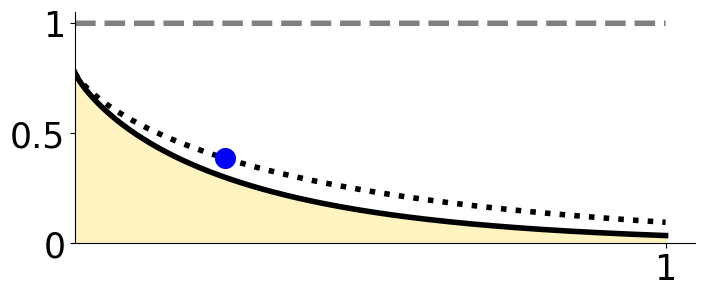

In [102]:
fig, ax = plt.subplots(figsize=(8,3))

plt.plot(t, MI, color='black', linewidth=lw, linestyle='dotted')
plt.plot(t, MI_exp, color='black', linewidth=lw)


plt.fill_between(t, MI_exp, alpha=0.25, color='gold') 
plt.scatter(t_life, 0.5*MI[0], color='blue', s=200, zorder=3)
plt.plot(t, np.ones_like(t), linestyle='--', color='gray', linewidth=lw) 


ax.spines[['right', 'top']].set_visible(False)
plt.xticks([1],fontsize=25); 
plt.yticks([0,0.5, 1], ['0','0.5', '1'], fontsize=25)
plt.xlim(0, None); plt.ylim(0, None)

save_file('MI_exp_demo')
plt.show()

## f. Performance of two-state model vs turnover time scale

Plot performance of two-state model vs turnover time scale  ($1/\gamma$).

In [111]:
t_min, t_max, num_t = 0, 50, 10000
t = np.linspace(t_min, t_max, num_t)


# Set up array of parameters to test
eps = 0.1
inv_gamma = np.linspace(0.01, 20, 1000)
num_gamma = len(inv_gamma)
params_list = []
for i in range(num_gamma): params_list.append( {'eps':eps, 'gamma':1/inv_gamma[i]}   )


# Get performances
J = get_performances(t, params_list, get_probs_twostate, get_MI, tau=100)
J_max = np.max(J)

ig_star = inv_gamma[np.argwhere(J_scale >= 1)[0]][0]
print(ig_star)

5.552772772772772


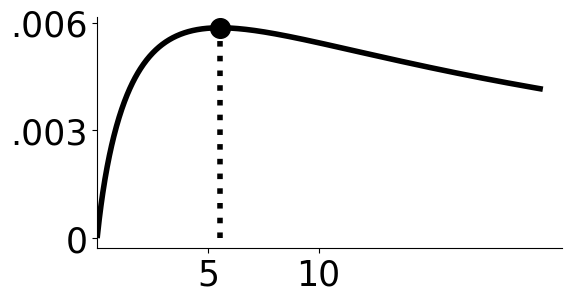

In [113]:
fig, ax = plt.subplots(figsize=(6,3))
plt.plot(inv_gamma, J, color='black', linewidth=lw)
plt.scatter(ig_star,J_max, color='black', s=200)
plt.plot( ig_star*np.ones(10), np.linspace(0, J_max, 10), linestyle='dotted', color='black', linewidth=4, alpha=1)

ax.spines[['right', 'top']].set_visible(False)
plt.xlim(0,None);# plt.ylim(0, None)
plt.xticks([5, 10],fontsize=25)
plt.yticks([0,  0.003, 0.006], ['0', '.003', '.006'], fontsize=25)

save_file('performance_twostate')
plt.show()